<a href="https://colab.research.google.com/github/adetayomathew1/-Installing-VirtualBox-and-Server-2022/blob/main/CHAOTIC_SYSTEM_MODELLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT REMODELLING OF CHAOTIC SYSTEM(Lorentz effect) USING LSTM AND RNN

Importing the necessary libaries for calculating and predicting our model

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense

Solving the lorentz attractor and saving the data in df

In [ ]:
# Generate Lorenz system data
def lorentz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

sigma, rho, beta = 10.0, 28.0, 8.0 / 3.0
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

solution = solve_ivp(lorentz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval, method='RK45')
df = pd.DataFrame({'time': solution.t, 'x': solution.y[0], 'y': solution.y[1], 'z': solution.y[2]})

Checking out the data

In [ ]:
df

,time,x,y,z
0,0.000000,1.000000,1.000000,1.000000
1,0.005001,1.003169,1.129886,0.992050
2,0.010001,1.012504,1.260031,0.984889
3,0.015002,1.027769,1.391200,0.978560
4,0.020002,1.048757,1.524150,0.973116
...,...,...,...,...
9995,49.979998,0.918787,1.697743,15.887825
9996,49.984998,0.957884,1.746507,15.685412
9997,49.989999,0.997531,1.798407,15.486261
9998,49.994999,1.037880,1.853508,15.290368


Viewing the data in 3d

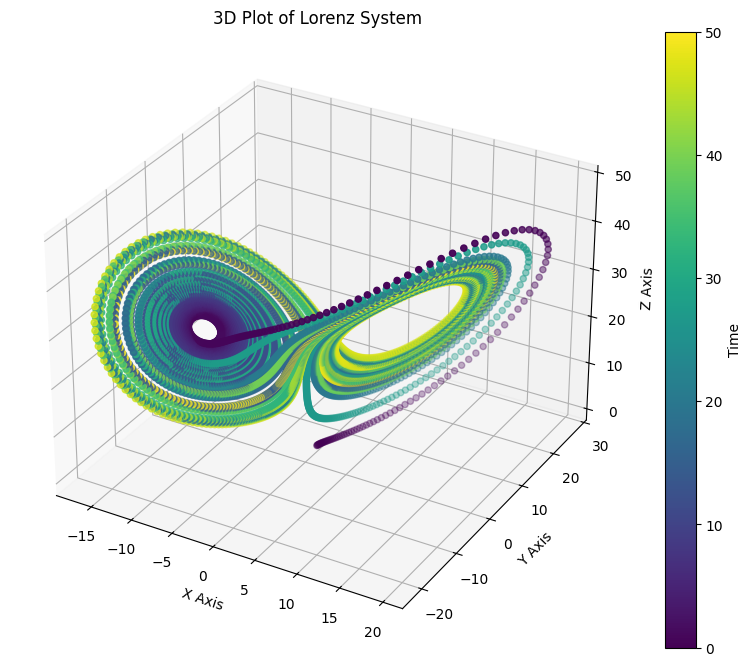

In [ ]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color the points based on time
sc = ax.scatter(df['x'], df['y'], df['z'], c=df['time'], cmap='viridis')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Plot of Lorenz System')

# Add a colorbar
plt.colorbar(sc, label='Time')

plt.show()


Preparing data for modelling


In [ ]:

# Prepare data for Keras
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

data = df[['x', 'y', 'z']].values
seq_length = 10
x, y = create_sequences(data, seq_length)


In [ ]:
y

array([[ 1.28742935,  2.40057276,  0.96388093],
       [ 1.34566303,  2.5662108 ,  0.96736217],
       [ 1.40935549,  2.73915085,  0.97269169],
       ...,
       [ 0.99753122,  1.79840709, 15.48626144],
       [ 1.03787957,  1.8535083 , 15.29036767],
       [ 1.07907433,  1.91188482, 15.09772919]])

In [ ]:
# Split into training and testing sets
split = int(0.7 * len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

In [ ]:
x_train.shape

(6993, 10, 3)

In [ ]:
y_train.shape

(6993, 3)

In [ ]:
x_test.shape

(2997, 10, 3)

In [ ]:

# Build and train RNN
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
RNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=50)

# Build and train LSTM
LSTMModel = Sequential()
LSTMModel.add(LSTM(16, input_shape=(None, 3)))
LSTMModel.add(Dense(3))
LSTMModel.compile(loss='mean_squared_error', optimizer='adam')
LSTMModel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 - 3s - 15ms/step - loss: 216.0043 - val_loss: 187.2762
Epoch 2/50
219/219 - 1s - 4ms/step - loss: 154.7888 - val_loss: 155.0444
Epoch 3/50
219/219 - 1s - 4ms/step - loss: 120.1868 - val_loss: 128.0107
Epoch 4/50
219/219 - 1s - 6ms/step - loss: 90.8677 - val_loss: 100.4270
Epoch 5/50
219/219 - 1s - 6ms/step - loss: 70.2012 - val_loss: 83.7031
Epoch 6/50
219/219 - 2s - 7ms/step - loss: 55.5179 - val_loss: 69.4210
Epoch 7/50
219/219 - 2s - 10ms/step - loss: 44.0983 - val_loss: 57.5992
Epoch 8/50
219/219 - 1s - 6ms/step - loss: 35.2628 - val_loss: 47.8054
Epoch 9/50
219/219 - 1s - 4ms/step - loss: 28.4270 - val_loss: 39.8887
Epoch 10/50
219/219 - 1s - 4ms/step - loss: 23.1650 - val_loss: 33.3968
Epoch 11/50
219/219 - 1s - 4ms/step - loss: 19.0813 - val_loss: 28.1846
Epoch 12/50
219/219 - 1s - 6ms/step - loss: 15.8723 - val_loss: 23.8577
Epoch 13/50
219/219 - 1s - 5ms/step - loss: 13.3064 - val_loss: 20.2643
Epoch 14/50
219/219 - 1s - 5ms/step - loss: 11.2263 - val_loss: 17.1920
Epo

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


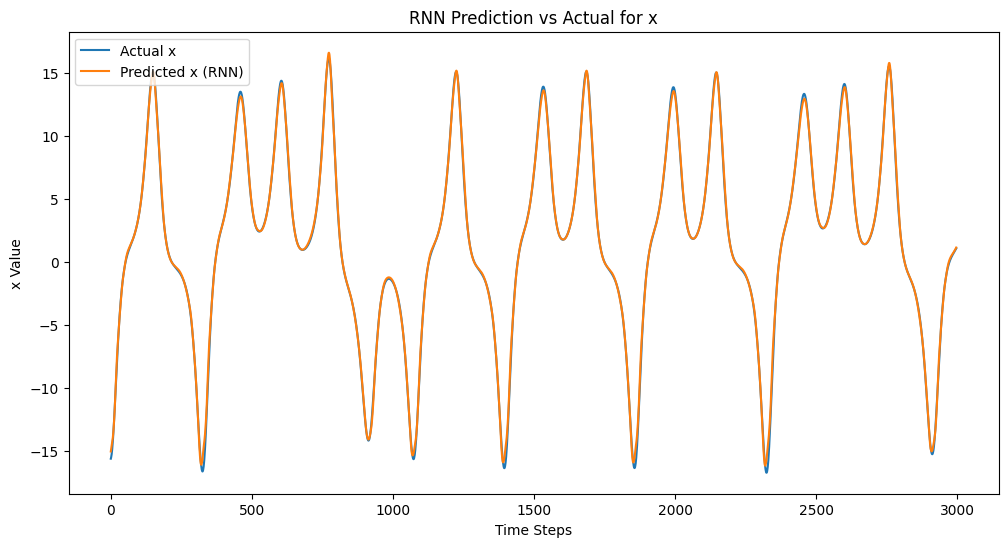

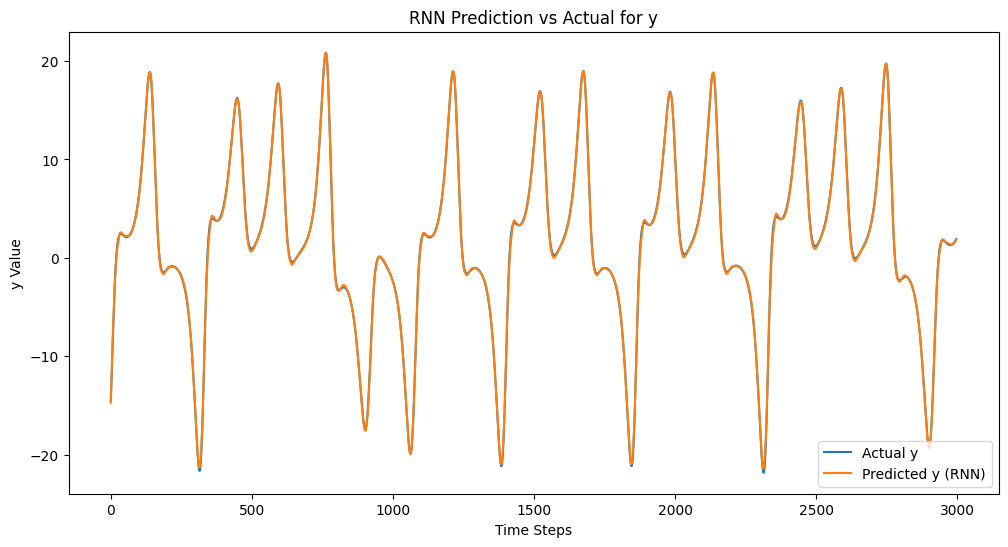

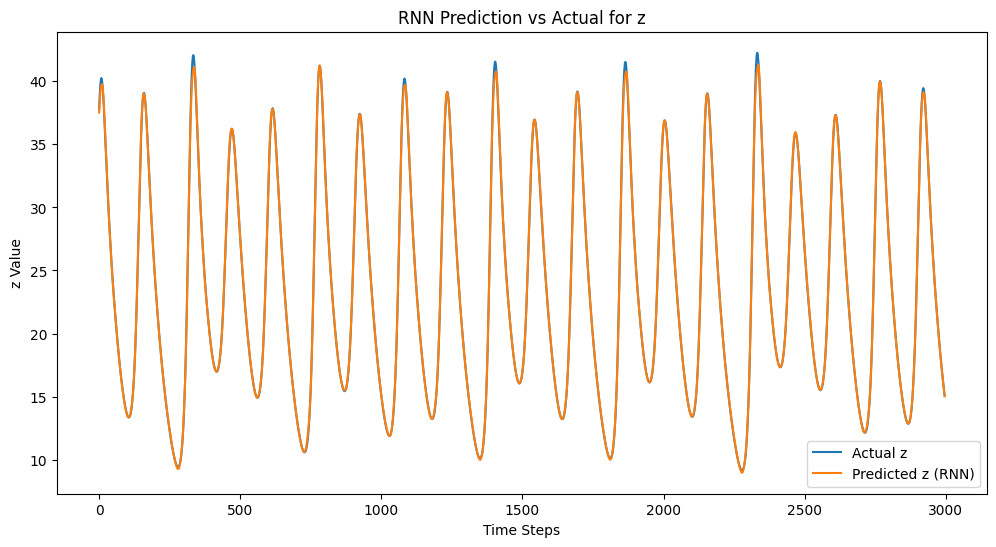

In [ ]:
# prompt: plot the actual and prediction for rnn model

import matplotlib.pyplot as plt
# Predict using RNN
rnn_predictions = RNNmodel.predict(x_test)

# Predict using LSTM
lstm_predictions = LSTMModel.predict(x_test)

# Plot actual vs. predicted for RNN
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual x')
plt.plot(rnn_predictions[:, 0], label='Predicted x (RNN)')
plt.xlabel('Time Steps')
plt.ylabel('x Value')
plt.title('RNN Prediction vs Actual for x')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='Actual y')
plt.plot(rnn_predictions[:, 1], label='Predicted y (RNN)')
plt.xlabel('Time Steps')
plt.ylabel('y Value')
plt.title('RNN Prediction vs Actual for y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual z')
plt.plot(rnn_predictions[:, 2], label='Predicted z (RNN)')
plt.xlabel('Time Steps')
plt.ylabel('z Value')
plt.title('RNN Prediction vs Actual for z')
plt.legend()
plt.show()

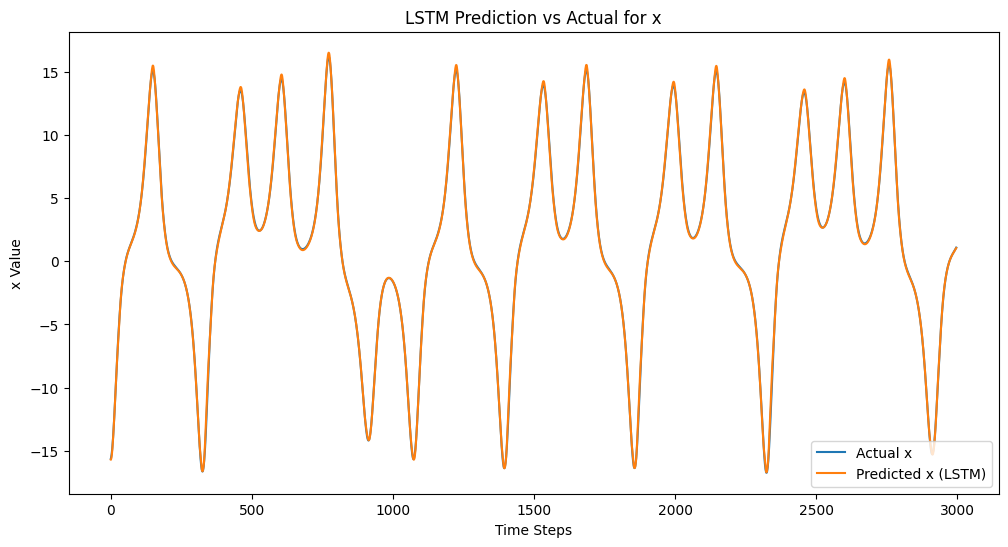

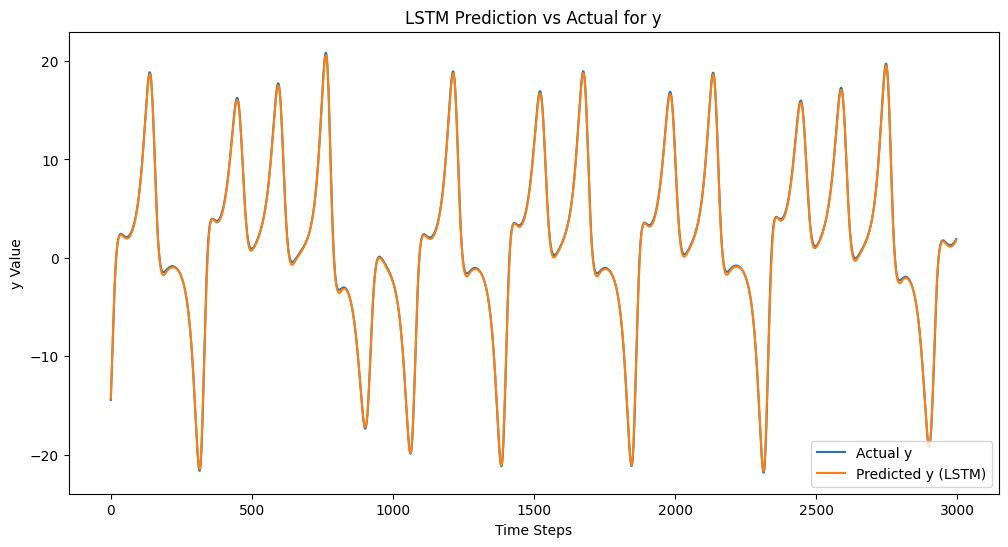

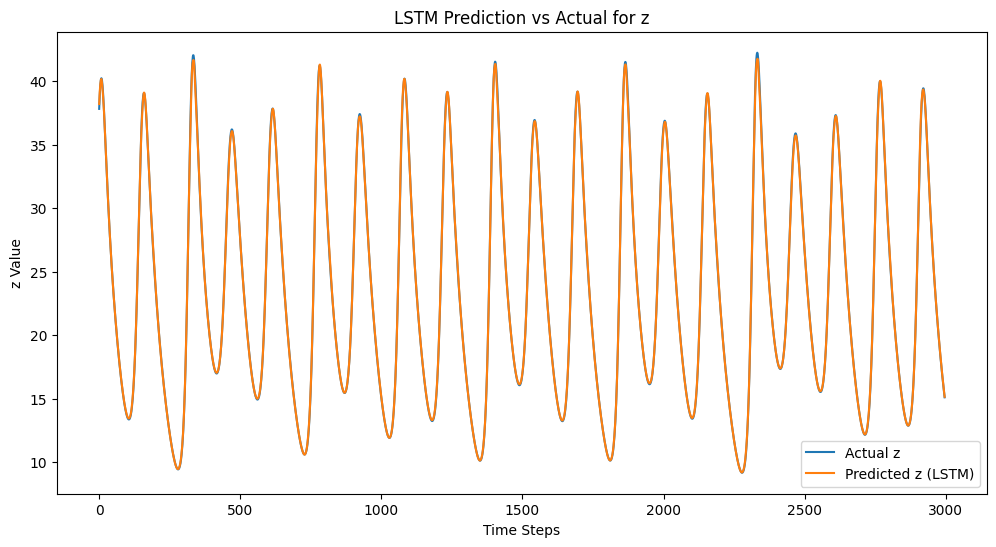

In [39]:
# prompt: genrate for lstm

import matplotlib.pyplot as plt
# Plot actual vs. predicted for LSTM
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual x')
plt.plot(lstm_predictions[:, 0], label='Predicted x (LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('x Value')
plt.title('LSTM Prediction vs Actual for x')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 1], label='Actual y')
plt.plot(lstm_predictions[:, 1], label='Predicted y (LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('y Value')
plt.title('LSTM Prediction vs Actual for y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 2], label='Actual z')
plt.plot(lstm_predictions[:, 2], label='Predicted z (LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('z Value')
plt.title('LSTM Prediction vs Actual for z')
plt.legend()
plt.show()


In [52]:
# prompt: get me the mean square error for both model

from sklearn.metrics import mean_squared_error

# Calculate MSE for RNN
rnn_mse = mean_squared_error(y_test, rnn_predictions)
print(f"RNN Mean Squared Error: {rnn_mse}")

# Calculate MSE for LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions)
print(f"LSTM Mean Squared Error: {lstm_mse}")


RNN Mean Squared Error: 0.0377043498382572
LSTM Mean Squared Error: 0.022372211785900434


In [51]:
RNNmodel.loss

'mean_squared_error'

In [54]:
# prompt: use 75 epoch for both model

# Build and train RNN
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
RNNmodel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=75)

# Build and train LSTM
LSTMModel = Sequential()
LSTMModel.add(LSTM(16, input_shape=(None, 3)))
LSTMModel.add(Dense(3))
LSTMModel.compile(loss='mean_squared_error', optimizer='adam')
LSTMModel.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=2, epochs=75)


Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 - 3s - 14ms/step - loss: 236.1609 - val_loss: 202.0259
Epoch 2/75
219/219 - 1s - 5ms/step - loss: 170.0206 - val_loss: 161.0886
Epoch 3/75
219/219 - 1s - 5ms/step - loss: 130.9568 - val_loss: 128.1602
Epoch 4/75
219/219 - 1s - 4ms/step - loss: 100.4861 - val_loss: 103.0509
Epoch 5/75
219/219 - 1s - 5ms/step - loss: 77.6476 - val_loss: 83.2741
Epoch 6/75
219/219 - 1s - 7ms/step - loss: 60.1632 - val_loss: 67.8352
Epoch 7/75
219/219 - 2s - 9ms/step - loss: 46.9444 - val_loss: 55.9251
Epoch 8/75
219/219 - 1s - 6ms/step - loss: 37.0261 - val_loss: 46.2758
Epoch 9/75
219/219 - 1s - 6ms/step - loss: 29.4453 - val_loss: 38.4826
Epoch 10/75
219/219 - 1s - 4ms/step - loss: 23.6537 - val_loss: 32.1665
Epoch 11/75
219/219 - 1s - 6ms/step - loss: 19.2321 - val_loss: 27.0267
Epoch 12/75
219/219 - 1s - 5ms/step - loss: 15.8252 - val_loss: 22.8231
Epoch 13/75
219/219 - 1s - 5ms/step - loss: 13.1701 - val_loss: 19.3551
Epoch 14/75
219/219 - 1s - 7ms/step - loss: 11.0561 - val_loss: 16.4348
Epo

In [56]:
# prompt: give me the mean error for 75 and 50 epochs

# Predict using RNN
rnn_predictions_75 = RNNmodel.predict(x_test)

# Predict using LSTM
lstm_predictions_75 = LSTMModel.predict(x_test)

# Calculate MSE for RNN with 75 epochs
rnn_mse_75 = mean_squared_error(y_test, rnn_predictions_75)
print(f"RNN Mean Squared Error (75 epochs): {rnn_mse_75}")

# Calculate MSE for LSTM with 75 epochs
lstm_mse_75 = mean_squared_error(y_test, lstm_predictions_75)
print(f"LSTM Mean Squared Error (75 epochs): {lstm_mse_75}")

print(f"RNN Mean Squared Error (50 epochs): {rnn_mse}")
print(f"LSTM Mean Squared Error (50 epochs): {lstm_mse}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Mean Squared Error (75 epochs): 0.006762300790414331
LSTM Mean Squared Error (75 epochs): 0.010519335792068185
RNN Mean Squared Error (50 epochs): 0.0377043498382572
LSTM Mean Squared Error (50 epochs): 0.022372211785900434
